In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
responses = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/anon_responses.csv", encoding='cp1252')
responses.columns = responses.columns[:1].tolist() + ['Option 1','Option 2','Option 3','Opiton 4']
responses = pd.melt(responses, id_vars=['Key'])

assignment = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rotations.csv").drop(['rotation_order'], axis = 1)

responses = pd.merge(responses, assignment[['studentID', 'optimal_rotation']],  
                     how='left', 
                     left_on=['Key'], right_on=['studentID']).drop(columns=['Key'])
responses

,variable,value,studentID,optimal_rotation
0,Option 1,0,1,Option 4
1,Option 1,0,2,Option 4
2,Option 1,0,3,Option 4
3,Option 1,0,4,Option 3
4,Option 1,0,5,Option 1
...,...,...,...,...
303,Opiton 4,0,73,Option 2
304,Opiton 4,0,74,Option 3
305,Opiton 4,1,75,Option 2
306,Opiton 4,0,76,Option 3


## Basic Analysis of Anonomyzed Beans Submission

In [53]:
n_students = max(responses['studentID'])
print("Percent of students who recieved their first choice rotation:")
sum(responses['variable'] == responses['optimal_rotation'])/n_students

Percent of students who recieved their first choice rotation: 


0.7402597402597403

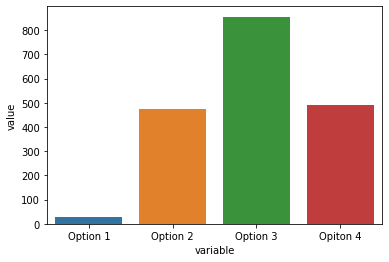

In [45]:
barplot = sns.barplot(x = "variable", y = "value", data = responses, estimator = sum, ci = None)

In [55]:
print("Percent of students who committed all their beans to a single rotation:")
sum(responses.value == 24)/n_students

Percent of students who committed all their beans to a single rotation:


0.7142857142857143

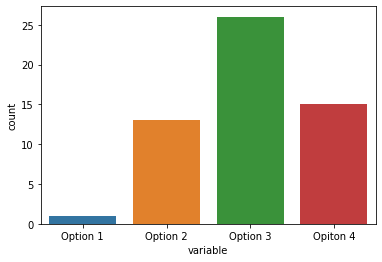

In [59]:
maxbeans = responses[responses['value'] == 24]
barplot = sns.countplot(x = "variable", data = maxbeans)

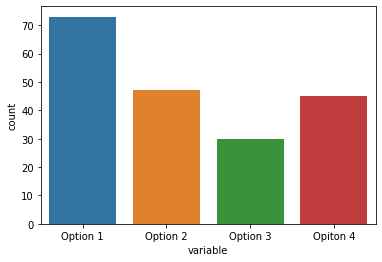

In [60]:
minbeans = responses[responses['value'] == 0]
barplot = sns.countplot(x = "variable", data = minbeans)

In [67]:
assignment.columns = ['studentID', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'optimal_rotation']

def get_col(sr):
    name=sr.idxmin()
    value = sr[name]
    return pd.Series([value, name])

assignment[['noptimal_beans','noptimal_rotation']] = assignment[['Option 1',	'Option 2', 'Option 3', 'Option 4']].apply(lambda x : get_col(x), axis=1)
assignment

,studentID,Option 1,Option 2,Option 3,Option 4,optimal_rotation,noptimal_beans,noptimal_rotation
0,1,0,0,12,12,Option 4,0,Option 1
1,2,0,0,0,24,Option 4,0,Option 1
2,3,0,0,0,24,Option 4,0,Option 1
3,4,0,0,24,0,Option 3,0,Option 1
4,5,0,0,24,0,Option 1,0,Option 1
...,...,...,...,...,...,...,...,...
72,73,0,24,0,0,Option 2,0,Option 1
73,74,0,0,24,0,Option 3,0,Option 1
74,75,0,21,2,1,Option 2,0,Option 1
75,76,0,0,24,0,Option 3,0,Option 1


In [74]:
sum(assignment['optimal_rotation'] == assignment['noptimal_rotation'])/n_students

0.19480519480519481

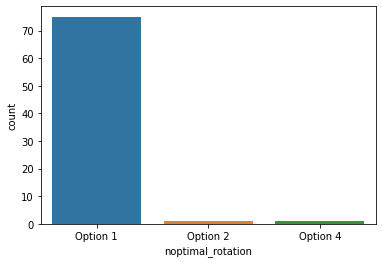

In [73]:
noptimalplot = sns.countplot(data = assignment, x = 'noptimal_rotation')